# 对链家网北京城六区二手房源数据的分析

## 导入链家网二手房在售房源数据（数据更新时间2018-11-3）

In [221]:
# coding=utf-8
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
# sys.stdout = stdout

# plt.rcParams['font.sans-serif'] = ['SimHei']    
# plt.rcParams['axes.unicode_minus'] = False

#所有房源信息
house=pd.read_csv('houseinfo_readable_withXY_correct_12000.csv')

# 所有小区信息
community=pd.read_csv('community_readable.csv')



# # 将小区信息和房屋信息表格拼接
community['community'] = community['title']
house_detail = pd.merge(house, community, on='community')

## 将字符串转换为数字

In [222]:
# 将字符串转换成数字
def data_adj(area_data, str):       
    if str in area_data :        
        return float(area_data[0 : area_data.find(str)])    
    else :        
        return None
# 处理房屋面积数据
house['square'] = house['square'].apply(data_adj,str = '平米')

## 删除车位信息

In [223]:
# car=house[house.housetype.str.contains('车位')]
# print ('记录中共有车位%d个'%car.shape[0])
# house.drop(car.index,inplace=True)
# print ('现在还剩下%d条记录'%house.shape[0])

## 价格最高的5个别墅

In [204]:

# bieshu.sort_values('totalPrice',ascending=False).head(5)

## 删除别墅信息

In [205]:
bieshu=house[house.housetype.str.contains('别墅')]
print ('记录中共有%d栋别墅'%bieshu.shape[0])
house.drop(bieshu.index,inplace=True)
print ('删除别墅后，现在还剩下%d条房屋记录'%house.shape[0])

记录中共有7栋别墅
删除别墅后，现在还剩下12334条房屋记录


## 总价前十的房源

In [206]:
totalHighest10 = house.sort_values('totalPrice',ascending=False).head(10)
display(totalHighest10)
totalHighest10.to_csv("totalHighest10.csv",index=False,sep=',')

,houseID,title,link,community,years,housetype,square,direction,floor,taxtype,totalPrice,unitPrice,followInfo,decoration,validdate,coor_xy
1860,1.011030e+11,东单灯市口 霞公府 南北向4居 诚意出售 高楼层,https://bj.lianjia.com/ershoufang/101103153250...,霞公府,中楼层(共7层)/2011年建板楼/东单,4室2厅,497.57,南 北,中楼层(共7层)/2011年建板楼/东单,房本满五年,6688.0,134414,196人关注/2次带看近地铁6688万单价134414元/平米,精装,12:16.7,"116.408453,39.909869"
3280,1.011030e+11,朱雀门坡上叠拼别墅 东南北三面采光 带60平米花园,https://bj.lianjia.com/ershoufang/101102721772...,朱雀门,底层(共5层)/2008年建板楼/陶然亭,4室2厅,376.28,东 南 北,底层(共5层)/2008年建板楼/陶然亭,房本满五年,5239.0,139232,240人关注/6次带看房本满五年随时看房5239万单价139232元/平米,其他,13:39.2,"116.388148,39.875875"
1199,1.011030e+11,北二环 中轴国际 高层观景房 平层一梯一户,https://bj.lianjia.com/ershoufang/101103070630...,中轴国际,高楼层(共21层)/2005年建板楼/安定门,4室4厅,452.80,南 西北,高楼层(共21层)/2005年建板楼/安定门,房本满五年,4972.0,109806,83人关注/0次带看近地铁房本满五年4972万单价109806元/平米,精装,11:40.5,"116.400677,39.950142"
4055,1.011020e+11,耕天下 平层五居室 五个卧室朝南 带露台 园区中间位置,https://bj.lianjia.com/ershoufang/101102234163...,耕天下,中楼层(共7层)/2003年建板楼/陶然亭,5室3厅,330.24,南 北,中楼层(共7层)/2003年建板楼/陶然亭,房本满五年,4650.0,140807,117人关注/0次带看房本满五年4650万单价140807元/平米,其他,14:24.4,"116.391903,39.873245"
3938,1.011020e+11,金融世家 大户型 配套齐 一个房本 诚心卖,https://bj.lianjia.com/ershoufang/101102374972...,金融世家,中楼层(共15层)/2008年建板塔结合/木樨地,4室2厅,300.79,西北,中楼层(共15层)/2008年建板塔结合/木樨地,房本满五年,4250.0,141295,190人关注/1次带看近地铁房本满两年4250万单价141295元/平米,精装,14:17.6,"116.346735,39.904601"
4631,1.011030e+11,红玺台东户高层观景房几乎全新拎包即住,https://bj.lianjia.com/ershoufang/101102673940...,红玺台,高楼层(共24层)/2011年建板楼/太阳宫,4室2厅,300.84,南 北,高楼层(共24层)/2011年建板楼/太阳宫,房本满五年,4200.0,139610,201人关注/5次带看近地铁房本满五年4200万单价139610元/平米,精装,15:01.1,"116.439163,39.979600"
6174,1.011030e+11,高层观景4+2户型 南北通透 独梯独户,https://bj.lianjia.com/ershoufang/101102982736...,棕榈泉国际公寓,中楼层(共30层)/2003年建板楼/朝阳公园,4室2厅,369.58,南 北,中楼层(共30层)/2003年建板楼/朝阳公园,房本满五年,4180.0,113102,86人关注/2次带看近地铁房本满五年4180万单价113102元/平米,精装,16:29.8,"116.425310,39.995172"
384,1.011010e+11,海晟名苑南区 3室2厅 4000万,https://bj.lianjia.com/ershoufang/101100826453...,海晟名苑南区,顶层(共22层)/2004年建板塔结合/工体,3室2厅,305.54,东 南 西 北,顶层(共22层)/2004年建板塔结合/工体,房本满五年,4000.0,130916,180人关注/0次带看房本满五年4000万单价130916元/平米,简装,10:54.9,"116.441909,39.937691"
7125,1.011030e+11,星河湾 4室2厅 4000万,https://bj.lianjia.com/ershoufang/101103054106...,星河湾,低楼层(共12层)/2006年建板楼/朝青,4室2厅,426.16,南 北,低楼层(共12层)/2006年建板楼/朝青,房本满五年,4000.0,93862,71人关注/0次带看近地铁房本满五年4000万单价93862元/平米,精装,17:25.4,"116.523310,39.928504"
4087,1.011030e+11,北二环内=什刹海区域=和政客明星做邻居=六层板楼电梯,https://bj.lianjia.com/ershoufang/101103020559...,丽豪园,顶层(共6层)/1999年建板楼/六铺炕,5室3厅,289.65,南 西 北,顶层(共6层)/1999年建板楼/六铺炕,房本满五年,3999.0,138064,60人关注/0次带看房本满五年3999万单价138064元/平米,精装,14:26.2,"116.388296,39.947370"


## 单价前十的房源

In [207]:
unitHighest10 = house.sort_values('unitPrice',ascending=False).head(10)
display(unitHighest10)
unitHighest10.to_csv("unitHighest10.csv",index=False,sep=',')

,houseID,title,link,community,years,housetype,square,direction,floor,taxtype,totalPrice,unitPrice,followInfo,decoration,validdate,coor_xy
3193,1.011030e+11,广电部 新小区 南向一居室 管理好 环境好,https://bj.lianjia.com/ershoufang/101103064332...,北滨河路2号院,中楼层(共16层)/1992年建塔楼/木樨地,1室1厅,53.80,南,中楼层(共16层)/1992年建塔楼/木樨地,房本满五年,806.9,149982,4人关注/2次带看近地铁房本满五年806.9万单价149982元/平米,其他,13:34.1,"116.351199,39.900688"
3502,1.011020e+11,西城广安门 三期复式 挑高5.2米 带赠送面积 采光好,https://bj.lianjia.com/ershoufang/101102397536...,荣丰2008,高楼层(共16层)/2007年建塔楼/广安门,1室1厅,31.14,西,高楼层(共16层)/2007年建塔楼/广安门,房本满五年,467.0,149968,200人关注/0次带看近地铁房本满两年467万单价149968元/平米,精装,13:51.8,"116.336616,39.894695"
1504,1.011030e+11,磁器库南巷 1室1厅 666万,https://bj.lianjia.com/ershoufang/101103495318...,磁器库南巷,底层(共1层)/2003年建板楼/东单,1室1厅,44.41,北,底层(共1层)/2003年建板楼/东单,房本满五年,666.0,149967,10人关注/7次带看近地铁房本满两年666万单价149967元/平米,精装,11:56.9,"116.406165,39.913017"
3365,1.011030e+11,满五年唯一，两层复式，有露台，精装修,https://bj.lianjia.com/ershoufang/101103445496...,阳光丽景,中楼层(共18层)/2003年建板塔结合/马甸,5室2厅,235.59,南 北,中楼层(共18层)/2003年建板塔结合/马甸,房本满五年,3533.0,149964,95人关注/7次带看房本满五年3533万单价149964元/平米,精装,13:44.9,"116.385834,39.964424"
2650,1.011030e+11,西城德胜2002年的小区 南北大两居 看房随时 随时签约,https://bj.lianjia.com/ershoufang/101103109420...,新外大街乙8号院,高楼层(共7层)/2002年建板楼/马甸,2室1厅,77.82,南 北,高楼层(共7层)/2002年建板楼/马甸,房本满五年,1167.0,149962,14人关注/6次带看随时看房1167万单价149962元/平米,精装,13:02.4,"116.372214,39.962012"
3659,1.011030e+11,朱雀门 南北两居 全明格局 看房方便随时签约,https://bj.lianjia.com/ershoufang/101103415542...,朱雀门,中楼层(共8层)/2009年建板楼/陶然亭,2室2厅,105.03,南 北,中楼层(共8层)/2009年建板楼/陶然亭,房本满五年,1575.0,149958,13人关注/6次带看1575万单价149958元/平米,精装,14:02.0,"116.388148,39.875875"
4408,1.011030e+11,金融街 西城晶华 东南方正两居室 朝向好 户型方正,https://bj.lianjia.com/ershoufang/101103429009...,西城晶华,底层(共11层)/2008年建板塔结合/金融街,2室2厅,116.58,东南,底层(共11层)/2008年建板塔结合/金融街,房本满五年,1748.0,149940,51人关注/3次带看近地铁1748万单价149940元/平米,精装,14:45.4,"116.365869,39.921067"
2841,1.011030e+11,房子带两个地下车位满五年家庭唯一采光视野好封闭管理,https://bj.lianjia.com/ershoufang/101102647932...,阳光丽景,顶层(共19层)/2003年建塔楼/马甸,4室2厅,153.41,南,顶层(共19层)/2003年建塔楼/马甸,房本满五年,2300.0,149926,221人关注/18次带看房本满五年2300万单价149926元/平米,精装,13:14.2,"116.385834,39.964424"
12018,1.011030e+11,万柳 碧水云天双南向两居室 诚意出售,https://bj.lianjia.com/ershoufang/101103002322...,碧水云天,低楼层(共16层)/2003年建塔楼/万柳,2室1厅,66.70,南,低楼层(共16层)/2003年建塔楼/万柳,房本满五年,1000.0,149926,20人关注/11次带看房本满五年1000万单价149926元/平米,精装,22:14.8,"116.492708,39.880533"
3574,1.011030e+11,西城区 地铁达官营站 荣丰2008三期复式出售,https://bj.lianjia.com/ershoufang/101103247746...,荣丰2008,中楼层(共16层)/2007年建塔楼/广安门,1室1厅,31.35,东,中楼层(共16层)/2007年建塔楼/广安门,房本满五年,470.0,149921,36人关注/0次带看近地铁房本满两年470万单价149921元/平米,其他,13:56.8,"116.336616,39.894695"


## 获取户型数量分布信息

In [208]:
# housetype = house['housetype'].value_counts()
# housetype.head(8).plot(kind='bar',x='housetype',y='size', title='户型数量分布')
# plt.legend(['数量']) 
# plt.show()

## 关注人数最多10套房源

In [209]:
house['guanzhu'] = house['followInfo'].apply(data_adj,str = '人关注')
guanzhuHighest10 = house.sort_values('guanzhu',ascending=False).head(10)
display(guanzhuHighest10)
guanzhuHighest10.to_csv("guanzhuHighest10.csv",index=False,sep=',')

,houseID,title,link,community,years,housetype,square,direction,floor,taxtype,totalPrice,unitPrice,followInfo,decoration,validdate,coor_xy,guanzhu
4872,1.011030e+11,华纺东区 南北通透 次顶层 无个税 有钥匙,https://bj.lianjia.com/ershoufang/101103060299...,华纺易城,高楼层(共18层)/2005年建板塔结合/朝青,2室1厅,94.06,南 北,高楼层(共18层)/2005年建板塔结合/朝青,房本满五年,745.0,79205,16772人关注/11次带看近地铁房本满五年745万单价79205元/平米,精装,15:14.8,"116.514192,39.929839",16772.0
2095,1.011030e+11,新街口平安里南北通透满五唯一 有钥匙随时看 独立管理,https://bj.lianjia.com/ershoufang/101103130761...,大乘巷,高楼层(共6层)/1989年建板楼/官园,2室1厅,59.60,南 北,高楼层(共6层)/1989年建板楼/官园,房本满五年,715.0,119967,13479人关注/33次带看近地铁房本满五年随时看房715万单价119967元/平米,简装,12:32.5,"116.366230,39.935495",13479.0
2091,1.011030e+11,北京西城月坛99年南北通透大两居，双阳台，采光无遮挡,https://bj.lianjia.com/ershoufang/101103229329...,月坛北街25号院,底层(共6层)/1999年建板楼/月坛,2室1厅,77.70,南 北,底层(共6层)/1999年建板楼/月坛,房本满五年,980.0,126127,9121人关注/27次带看近地铁房本满五年随时看房980万单价126127元/平米,精装,12:32.5,"116.338548,39.920261",9121.0
7625,1.011000e+11,角门东里两居，格局好，楼层好，业主诚心卖,https://bj.lianjia.com/ershoufang/101100452567...,角门东里,高楼层(共19层)/1995年建塔楼/角门,2室1厅,62.65,东南,高楼层(共19层)/1995年建塔楼/角门,房本满五年,380.0,60655,6745人关注/35次带看近地铁房本满五年随时看房380万单价60655元/平米,精装,17:55.2,"116.384616,39.847858",6745.0
7626,1.011020e+11,万科紫苑 南北通透全能小三居 精装修 保持好！,https://bj.lianjia.com/ershoufang/101102299892...,万科紫苑,低楼层(共15层)/2011年建板楼/青塔,3室2厅,95.22,南 北,低楼层(共15层)/2011年建板楼/青塔,房本满五年,695.0,72989,5865人关注/49次带看近地铁房本满两年随时看房695万单价72989元/平米,精装,17:55.2,"116.255762,39.868997",5865.0
7481,1.011030e+11,风景club南北通透3居格局方正诚意出售,https://bj.lianjia.com/ershoufang/101102731655...,风景club,顶层(共12层)/2007年建板楼/草桥,3室1厅,124.03,南 北,顶层(共12层)/2007年建板楼/草桥,房本满五年,890.0,71757,4794人关注/40次带看近地铁房本满五年随时看房890万单价71757元/平米,精装,17:48.5,"116.351285,39.841230",4794.0
7563,1.011020e+11,富卓苑 低楼层南北通透两居室 无遮挡,https://bj.lianjia.com/ershoufang/101101502347...,富卓苑,低楼层(共6层)/2000年建板楼/马家堡,2室1厅,69.59,南 北,低楼层(共6层)/2000年建板楼/马家堡,房本满五年,450.0,64665,4569人关注/15次带看近地铁房本满五年随时看房450万单价64665元/平米,简装,17:51.9,"116.378235,39.838490",4569.0
6070,1.011000e+11,弘善家园南向开间，满两年，免增值税,https://bj.lianjia.com/ershoufang/101100379913...,弘善家园,中楼层(共28层)/2009年建塔楼/潘家园,1室0厅,42.64,南,中楼层(共28层)/2009年建塔楼/潘家园,房本满五年,260.0,60976,3978人关注/16次带看近地铁房本满两年随时看房260万单价60976元/平米,毛坯,16:22.8,"116.453958,39.867764",3978.0
5142,1.011020e+11,北工大 禧福汇小区 南北三居 满五年 业主诚售,https://bj.lianjia.com/ershoufang/101102015306...,禧福汇,高楼层(共20层)/2008年建板塔结合/北工大,3室1厅,139.66,南 北,高楼层(共20层)/2008年建板塔结合/北工大,房本满五年,1170.0,83775,3454人关注/27次带看近地铁房本满五年随时看房1170万单价83775元/平米,精装,15:29.9,"116.475102,39.883100",3454.0
11791,1.011030e+11,时尚大两居，观景落地飘窗，视野广阔，采光好,https://bj.lianjia.com/ershoufang/101103177623...,中国房子,9层/2005年建板楼/田村,2室2厅,112.28,南,9层/2005年建板楼/田村,房本满五年,810.0,72142,3298人关注/15次带看房本满五年随时看房810万单价72142元/平米,简装,22:01.4,"116.304548,39.929429",3298.0


## 户型和关注人数的分布关系

In [210]:
plt.figure(dpi = 600)
fig, ax1 = plt.subplots(1,1)    
type_interest_group = house['guanzhu'].groupby(house['housetype']).agg([('户型', 'count'), ('关注人数', 'sum')])    
ti_sort = type_interest_group[type_interest_group['户型'] > 50].sort_values(by='户型') #取户型>50的数据
ti_sort.plot(kind='barh', grid=True, ax=ax1)    
plt.title('二手房户型和关注人数的分布关系')    
plt.ylabel('户型') 
plt.show()
fig.savefig("二手房户型和关注人数的分布关系.png")

## 面积分布

In [211]:
plt.figure(dpi = 600)
fig,ax2 = plt.subplots(1,1)    
area_level = [0, 50, 100, 150, 200, 250, 300, 500]    
label_level = ['小于50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']    
area_cut = pd.cut(house['square'], area_level, labels=label_level)        
area_cut.value_counts().plot(kind='bar', grid=True,ax=ax2)    
plt.title('二手房面积分布')    
plt.xlabel('面积')    
plt.legend(['数量'])    
plt.show()
fig.savefig("二手房面积分布.png")

## 聚类分析

In [212]:
# 缺失值处理:直接将缺失值去掉    
cluster_data = house[['guanzhu','square','totalPrice']].dropna()    
#将簇数设为3    
K_model = KMeans(n_clusters=3)    
alg = K_model.fit(cluster_data)    
'------聚类中心------'   
center = pd.DataFrame(alg.cluster_centers_, columns=['关注人数','面积','房价'])    
cluster_data['label'] = alg.labels_ 
center

,关注人数,面积,房价
0,76.852807,83.037477,599.123433
1,72.756473,173.220968,1627.547904
2,10396.400000,77.846000,703.000000


## 在售面积最小的十套二手房

In [213]:
smallestArea = house.sort_values('square',ascending=True).head(10)
display(smallestArea)

,houseID,title,link,community,years,housetype,square,direction,floor,taxtype,totalPrice,unitPrice,followInfo,decoration,validdate,coor_xy,guanzhu
11757,1.011020e+11,聚兴园产权车位，诚心出售，方便看,https://bj.lianjia.com/ershoufang/101102083610...,聚兴园,/2005年建板楼/鲁谷,车位,11.96,东 南 西 北,/2005年建板楼/鲁谷,房本满五年,25.0,20904,37人关注/0次带看房本满两年25万单价20904元/平米,无电梯,21:57.8,"116.222526,39.892695",37.0
11769,1.011030e+11,聚兴园 车位 30万,https://bj.lianjia.com/ershoufang/101102917689...,聚兴园,/2006年建板楼/鲁谷,车位,13.80,南 北,/2006年建板楼/鲁谷,房本满五年,30.0,21740,11人关注/0次带看房本满两年30万单价21740元/平米,无电梯,21:57.8,"116.222526,39.892695",11.0
4434,1.011030e+11,西绦南巷 1室1厅 213万,https://bj.lianjia.com/ershoufang/101102645058...,西绦南巷,底层(共1层)/2009年建暂无数据/六铺炕,1室1厅,15.25,南,底层(共1层)/2009年建暂无数据/六铺炕,房本满五年,213.0,139673,621人关注/4次带看近地铁213万单价139673元/平米,简装,14:47.2,"116.391059,39.947905",621.0
1474,1.011020e+11,华人一品阁 1房间1卫 90万,https://bj.lianjia.com/ershoufang/101101915213...,华人一品阁,低楼层(共3层)/2006年建板塔结合/东四,1房间1卫,16.12,南,低楼层(共3层)/2006年建板塔结合/东四,房本满五年,90.0,55832,202人关注/1次带看房本满五年90万单价55832元/平米,简装,11:55.1,"116.410599,39.932952",202.0
1554,1.011020e+11,华人一品阁 1房间1卫 90万,https://bj.lianjia.com/ershoufang/101101915230...,华人一品阁,低楼层(共3层)/2006年建板塔结合/东四,1房间1卫,16.12,南,低楼层(共3层)/2006年建板塔结合/东四,房本满五年,90.0,55832,105人关注/0次带看房本满五年90万单价55832元/平米,简装,11:58.6,"116.410599,39.932952",105.0
1770,1.011030e+11,华人一品阁 1房间1卫 110万,https://bj.lianjia.com/ershoufang/101102563755...,华人一品阁,低楼层(共3层)/2007年建板塔结合/东四,1房间1卫,20.28,北,低楼层(共3层)/2007年建板塔结合/东四,房本满五年,110.0,54241,32人关注/0次带看110万单价54241元/平米,精装,12:11.7,"116.410599,39.932952",32.0
4296,1.011030e+11,荣丰二期小户型，西城二环居家，精装修拎包入住,https://bj.lianjia.com/ershoufang/101103329581...,荣丰2008,低楼层(共20层)/2004年建塔楼/广安门,1室0厅,21.93,北,低楼层(共20层)/2004年建塔楼/广安门,房本满五年,325.0,148199,7人关注/1次带看近地铁房本满两年325万单价148199元/平米,精装,14:38.6,"116.336616,39.894695",7.0
8602,1.011030e+11,金色南向开间 满五年家庭名下仅一套住房,https://bj.lianjia.com/ershoufang/101103405391...,世纪金色嘉园,低楼层(共30层)/2003年建塔楼/北京南站,1室0厅,23.75,南,低楼层(共30层)/2003年建塔楼/北京南站,房本满五年,219.0,92211,51人关注/0次带看近地铁房本满五年219万单价92211元/平米,简装,18:52.9,"116.372109,39.869255",51.0
3074,1.011040e+11,西城 荣丰2008小区 楼西南角 随时看房 正南向,https://bj.lianjia.com/ershoufang/101103528644...,荣丰2008,高楼层(共26层)/2006年建塔楼/广安门,1室0厅,23.80,南,高楼层(共26层)/2006年建塔楼/广安门,房本满五年,320.0,134454,27人关注/23次带看近地铁随时看房320万单价134454元/平米,简装,13:27.3,"116.336616,39.894695",27.0
4072,1.011030e+11,荣丰南向开间 中间层 满五年 业主诚售,https://bj.lianjia.com/ershoufang/101103099015...,荣丰2008,中楼层(共26层)/2006年建塔楼/广安门,1室0厅,23.80,南,中楼层(共26层)/2006年建塔楼/广安门,房本满五年,335.0,140757,74人关注/3次带看近地铁房本满五年335万单价140757元/平米,精装,14:26.2,"116.336616,39.894695",74.0


## 在售面积最大二手房

In [214]:
largestArea = house.sort_values('square',ascending=False).head(10)
display(largestArea)

,houseID,title,link,community,years,housetype,square,direction,floor,taxtype,totalPrice,unitPrice,followInfo,decoration,validdate,coor_xy,guanzhu
11523,1.011030e+11,庐师山庄联排别墅 独立小庭院 上下三层 诚心出售,https://bj.lianjia.com/ershoufang/101103114726...,庐师山庄,2层/2006年建暂无数据/苹果园,5室2厅,535.31,南 北,2层/2006年建暂无数据/苹果园,房本满五年,3300.0,61647,30人关注/1次带看房本满五年3300万单价61647元/平米,其他,21:44.2,"116.195319,39.942990",30.0
3416,1.011020e+11,配套齐全，楼龄新，三层复式，业主诚心出售,https://bj.lianjia.com/ershoufang/101102231681...,立恒名苑,高楼层(共24层)/2002年建塔楼/天宁寺,7室3厅,532.82,南 西 北,高楼层(共24层)/2002年建塔楼/天宁寺,房本满五年,2480.0,46545,97人关注/4次带看房本满五年随时看房2480万单价46545元/平米,其他,13:46.6,"116.347683,39.883466",97.0
1185,1.011020e+11,金宝街 70年产权大四居 视野开阔 朝向好 大户型！,https://bj.lianjia.com/ershoufang/101101814319...,建国门北大街5号,高楼层(共24层)/2008年建塔楼/建国门内,4室1厅,508.74,东 南 西,高楼层(共24层)/2008年建塔楼/建国门内,房本满五年,2900.0,57004,136人关注/0次带看近地铁房本满五年随时看房2900万单价57004元/平米,精装,11:39.0,"116.433714,39.914319",136.0
1860,1.011030e+11,东单灯市口 霞公府 南北向4居 诚意出售 高楼层,https://bj.lianjia.com/ershoufang/101103153250...,霞公府,中楼层(共7层)/2011年建板楼/东单,4室2厅,497.57,南 北,中楼层(共7层)/2011年建板楼/东单,房本满五年,6688.0,134414,196人关注/2次带看近地铁6688万单价134414元/平米,精装,12:16.7,"116.408453,39.909869",196.0
7100,1.011030e+11,外交部南街京华豪园复式，改善客户购买，70年住宅产权,https://bj.lianjia.com/ershoufang/101102754825...,京华豪园,顶层(共21层)/2000年建塔楼/朝阳门外,6室3厅,483.70,西 西北 北,顶层(共21层)/2000年建塔楼/朝阳门外,房本满五年,2600.0,53753,112人关注/0次带看近地铁房本满五年2600万单价53753元/平米,简装,17:23.7,"116.436700,39.917794",112.0
3587,1.011030e+11,五栋大楼，南北通透，顶层复式，带电梯,https://bj.lianjia.com/ershoufang/101102655114...,五栋大楼,高楼层(共16层)/2005年建板塔结合/车公庄,5室3厅,462.94,南 西 北,高楼层(共16层)/2005年建板塔结合/车公庄,房本满五年,2540.0,54867,107人关注/1次带看近地铁房本满五年随时看房2540万单价54867元/平米,精装,13:56.8,"116.348656,39.933556",107.0
1199,1.011030e+11,北二环 中轴国际 高层观景房 平层一梯一户,https://bj.lianjia.com/ershoufang/101103070630...,中轴国际,高楼层(共21层)/2005年建板楼/安定门,4室4厅,452.80,南 西北,高楼层(共21层)/2005年建板楼/安定门,房本满五年,4972.0,109806,83人关注/0次带看近地铁房本满五年4972万单价109806元/平米,精装,11:40.5,"116.400677,39.950142",83.0
1970,1.011020e+11,东城区凯德华玺封闭式管理西南向带露台,https://bj.lianjia.com/ershoufang/101102182731...,凯德华玺,低楼层(共14层)/2008年建塔楼/金宝街,6房间5卫,439.04,南 北,低楼层(共14层)/2008年建塔楼/金宝街,房本满五年,3500.0,79720,43人关注/1次带看近地铁房本满五年3500万单价79720元/平米,精装,12:21.7,"116.420545,39.923876",43.0
8756,1.011030e+11,中海九号公馆 5室3厅 3100万,https://bj.lianjia.com/ershoufang/101102507319...,中海九号公馆,3层/2012年建暂无数据/科技园区,5室3厅,437.46,南 北,3层/2012年建暂无数据/科技园区,房本满五年,3100.0,70864,32人关注/5次带看近地铁房本满两年随时看房3100万单价70864元/平米,毛坯,19:01.4,"116.295990,39.817889",32.0
12241,1.011030e+11,业主诚售西山壹号院精装修一层下跃,https://bj.lianjia.com/ershoufang/101102503341...,西山壹号院,底层(共6层)/2013年建板楼/西北旺,4室3厅,435.24,南 北,底层(共6层)/2013年建板楼/西北旺,房本满五年,3500.0,80416,67人关注/9次带看房本满两年随时看房3500万单价80416元/平米,精装,22:27.0,"116.268596,40.040056",67.0


## 城六区各区二手房源均价

In [215]:
# house_unitprice_perdistrict = house_detail.groupby('district').mean()['unitPrice']
# house_unitprice_perdistrict.plot(kind='bar',x='district',y='unitPrice', title='各个行政区房源均价')
# plt.legend(['均价']) 
# plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

## 各个区域房源数量排序

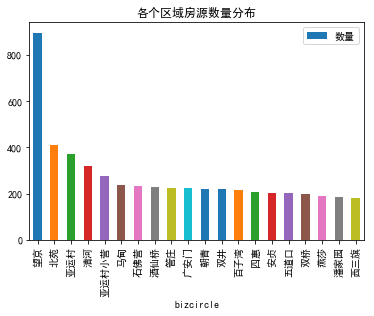

In [15]:
bizcircle_count=house_detail.groupby('bizcircle').size().sort_values(ascending=False)
bizcircle_count.head(20).plot(kind='bar',x='bizcircle',y='size', title='各个区域房源数量分布')
plt.legend(['数量']) 
plt.show()

## 各个区域均价排序

In [218]:
bizcircle_unitprice=house_detail.groupby('bizcircle').mean()['unitPrice'].sort_values(ascending=False)
bizcircle_unitprice.head(20).plot(kind='bar',x='bizcircle',y='unitPrice', title='各个区域均价分布')
plt.legend(['均价']) 
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

## 各个区域小区数量

In [217]:
bizcircle_community=community.groupby('bizcircle')['title'].size().sort_values(ascending=False)
bizcircle_community.head(20).plot(kind='bar', x='bizcircle',y='size', title='各个区域小区数量分布')
plt.legend(['数量']) 
plt.show()

## 按小区均价排序

In [216]:
community_unitprice = house.groupby('community').mean()['unitPrice'].sort_values(ascending=False)
community_unitprice.head(15).plot(kind='bar',x='community',y='unitPrice', title='各个小区均价分布')
plt.legend(['均价']) 
plt.show()